# ***Classification with Support Vector Machines***

In [49]:
import random, math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Utils

### Generating data

In [53]:
def generate_data(params):
    np.random.seed(100)
    nA, nB, mAx, mAy, mBx, mBy, sigmaA, sigmaB = params["nA"], params["nB"], params["mAx"], params["mAy"], params["mBx"], params["mBy"], params["sigmaA"], params["sigmaB"]

    classA = np.concatenate (
    (np.random.randn(nA , 2) * sigmaA + [mAx[0], mAy[0]],
    np.random.randn(nA , 2) * sigmaA + [mAx[1], mAy[1]],))
    classB = np.random.randn (nB , 2) * sigmaB + [mBx, mBy]

    inputs = np.concatenate ((classA, classB))
    targets = np.concatenate ((np.ones (classA.shape [0]),
                           -np.ones (classB.shape [0])))

    N = inputs.shape[0] # number of rows samples

    permute = list(range(N))
    random.shuffle(permute)

    inputs = inputs[permute,:]
    targets = targets[permute]
    return classA, classB, inputs, targets

### Kernel functions

In [209]:
def linear_kernel(x1, x2, param=None):
    return np.dot(x1, x2)

def polynomial_kernel(x1, x2, p):
    return (np.dot(x1,x2) + 1) ** p

def RBF_kernel(x1, x2, sigma):
    distance_squared = np.linalg.norm(x1 - x2) ** 2
    return math.exp(- distance_squared / (2 * ((sigma)**2)) )

### Function objective

Pre computing

In [177]:
def build_P(X, T, K, param=None):
    '''
    Building a matrix P such as P[i,j] = ti*tj*Kernel(xi, xj)
    takes: X = data, T = targets, K = kernel function, param = degree or sigma for advanced kernels
    return P
    '''
    P = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            P[i,j] = T[i] * T[j] * K(X[i,:], X[j,:], param)
    return P

Final function objective

In [63]:
def objective(alpha):
    prod_vector = np.dot(P, alpha)
    return 0.5 * np.dot(alpha, prod_vector) - sum(alpha)

Function zerofun

In [66]:
def zerofun(alpha):
    return np.dot(alpha, T)

### Extracting support vectors

In [69]:
def extract_SV(alpha):  
    SV = []
    for i in range(N):
        if alpha[i] > 1e-5:
            SV.append([X[i,:], T[i], alpha[i]])
    return SV

### Computing b

In [143]:
def compute_b(SV, param=None):
    b = 0
    s = SV[0][0] # random choice among SVs
    ts = SV[0][1]
    for i in range(len(SV)): # we can only take SVs since other alpha values are 0
        b += SV[i][2] * SV[i][1] * K(s, SV[i][0], param)
    b -= ts
    return b

### Function indicator

In [154]:
def indicator(x, y, SV, b, param=None):
    res = 0
    s = [x,y]
    for i in range(len(SV)):
        res += SV[i][2] * SV[i][1] * K(s, SV[i][0], param)
    return res - b

### Plotting 

In [162]:
def plot(classA, classB, SV, b, param=None):
    # Plot data
    plt.plot ([p[0] for p in classA], 
              [p[1] for p in classA] ,
              'b.')
    plt.plot ( [p[0] for p in classB] , 
              [p[1] for p in classB] ,
              'r.')
    plt.plot([p[0][0] for p in SV],
             [p[0][1] for p in SV],
             'g.') # we plot SVs in green
    
    # Plot decision boundary
    xgrid = np.linspace(-5, 5)
    ygrid = np.linspace(-4, 4)
    grid = np.array([[indicator(x,y, SV, b, param) for x in xgrid ] for y in ygrid])
    plt.contour(xgrid , ygrid, grid,
                ( -1.0 , 0.0 , 1.0 ),
                colors =('red','black','blue'),
                linewidths =(1 , 3 , 1))

## Experiments

### 1) Linear kernel

In [213]:
# Kernel type
K = linear_kernel

Effect of the distance:

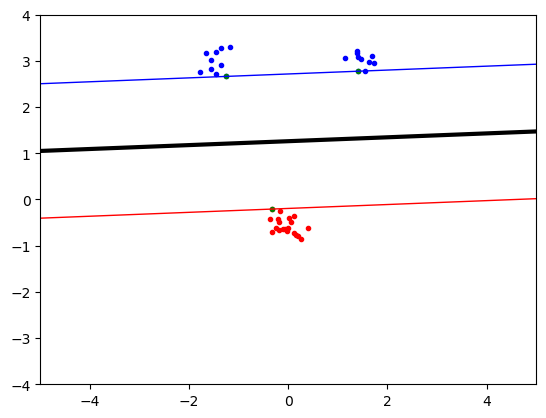

In [92]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[3,3],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

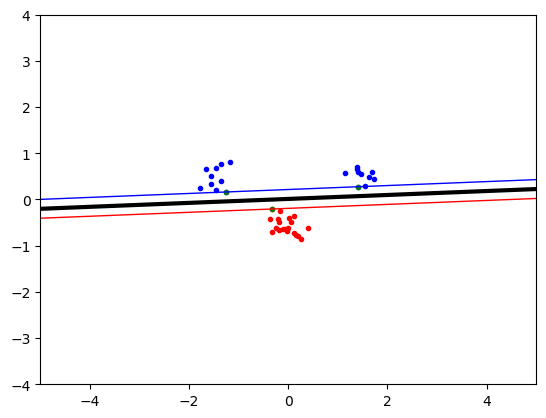

In [84]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

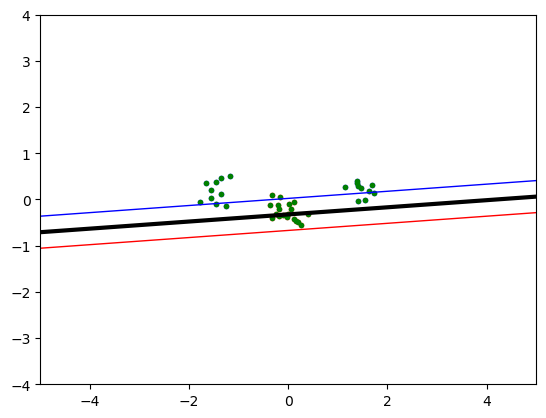

In [94]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.2,0.2],"mBx":0.0,"mBy":-0.2,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

Effect of the size:

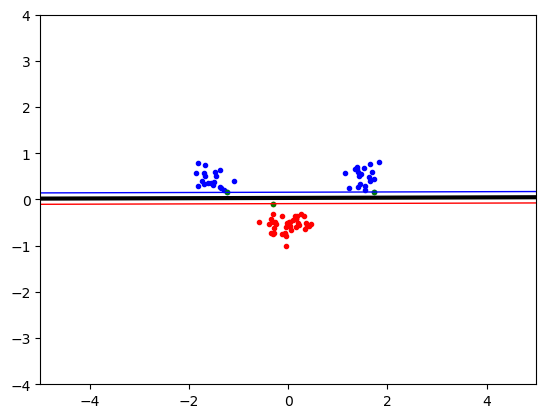

In [111]:
# Generate data
params = {"nA":20,"nB":40,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

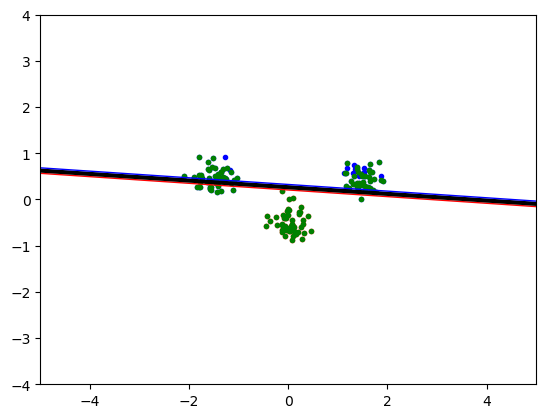

In [109]:
# Generate data
params = {"nA":50,"nB":50,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

Effect of the spread:

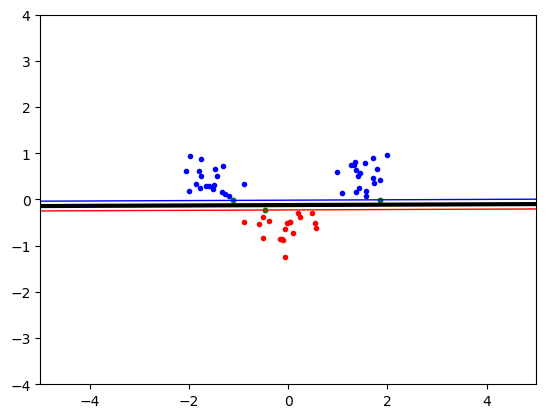

In [119]:
# Generate data
params = {"nA":20,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.3,"sigmaB":0.3}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

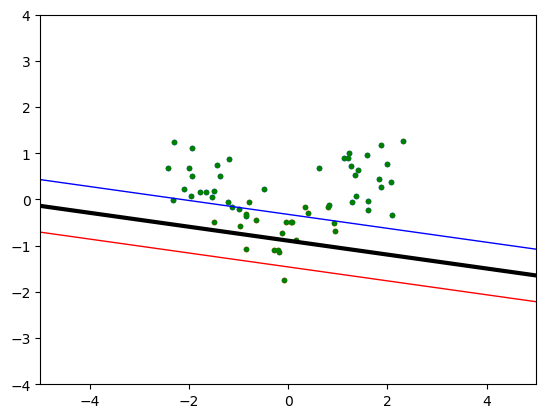

In [129]:
# Generate data
params = {"nA":20,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.5,"sigmaB":0.5}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

Effect of the margin C:

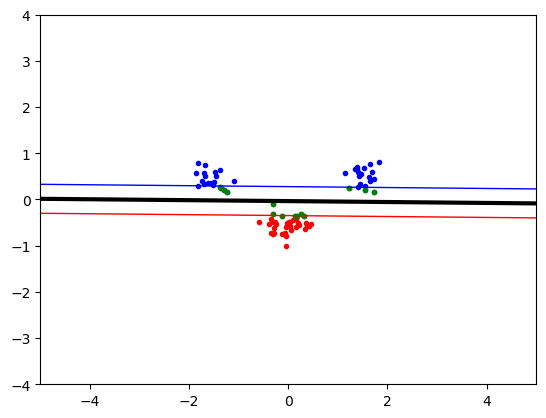

In [229]:
# Generate data
params = {"nA":20,"nB":40,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, C) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

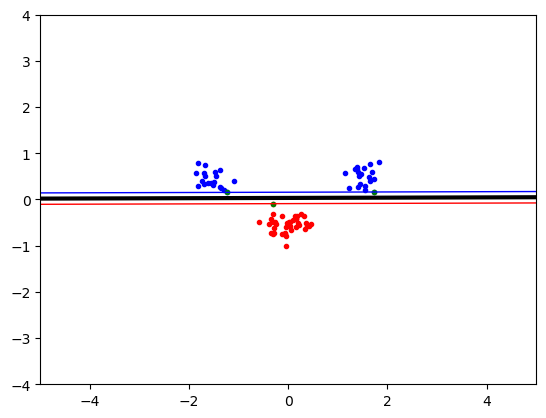

In [225]:
# Generate data
params = {"nA":20,"nB":40,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
C = 100 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, C) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV)

# Plot
plot(classA, classB, SV, b)

## 2) Polynomial kernel

In [149]:
# Kernel type
K = polynomial_kernel

Degree 1:

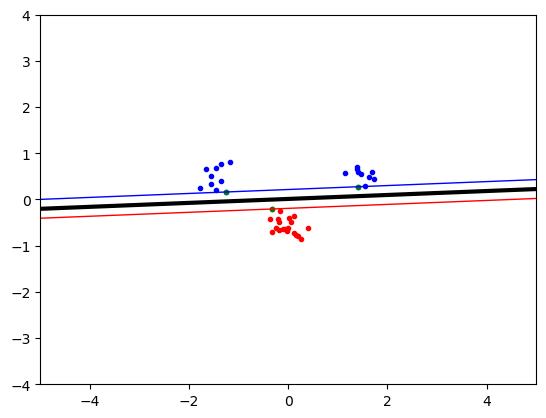

In [179]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
degree = 1
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K, degree)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV, degree)

# Plot
plot(classA, classB, SV, b, degree)

Degree 2:

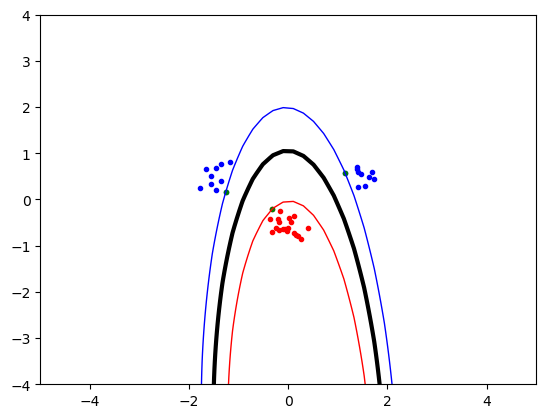

In [181]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
degree = 2
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K, degree)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV, degree)

# Plot
plot(classA, classB, SV, b, degree)

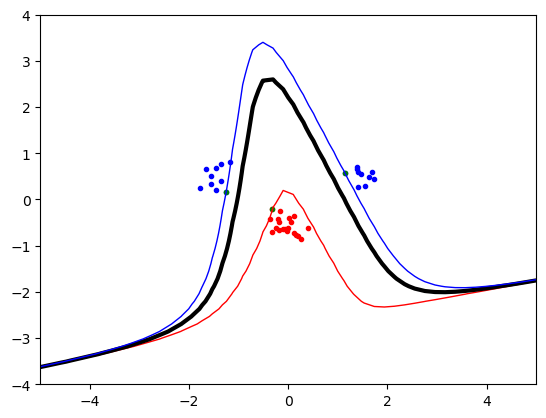

In [183]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
degree = 5
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K, degree)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV, degree)

# Plot
plot(classA, classB, SV, b, degree)

### RBF Kernel

In [190]:
K = RBF_kernel

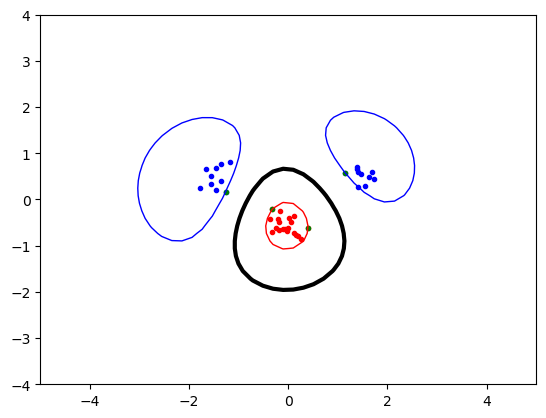

In [192]:
# Generate data
params = {"nA":10,"nB":20,"mAx":[1.5,-1.5],"mAy":[0.5,0.5],"mBx":0.0,"mBy":-0.5,"sigmaA":0.2,"sigmaB":0.2}
classA, classB, inputs, targets = generate_data(params)

# SVM
sigma = 1
C = 1 # sets how strict we are regarding margins
X = inputs
T = targets
N = inputs.shape[0]
B = [(0, C) for b in range(N)]
start = np.zeros(N)
P = build_P(X, T, K, sigma)
XC = {'type':'eq', 'fun':zerofun}
ret = minimize(objective, start, bounds=[(0, None) for b in range(N)], constraints=XC)
alpha = ret['x']
SV = extract_SV(alpha)
b = compute_b(SV, sigma)

# Plot
plot(classA, classB, SV, b, sigma)